# Analysis of Daily Mail & Advert data
Author: Adil Khan

This notebook looks at data for an advertising campagin. A dash app is created that allows a user to interact with the advertising campaign data, local weather data, and sentiment analyses from the daily mail.

fbprophet is used on the Impressions timeseries. It allows us to detect trends in the data and predict into the future.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from fbprophet import Prophet

## Load Advertising Campaign Data

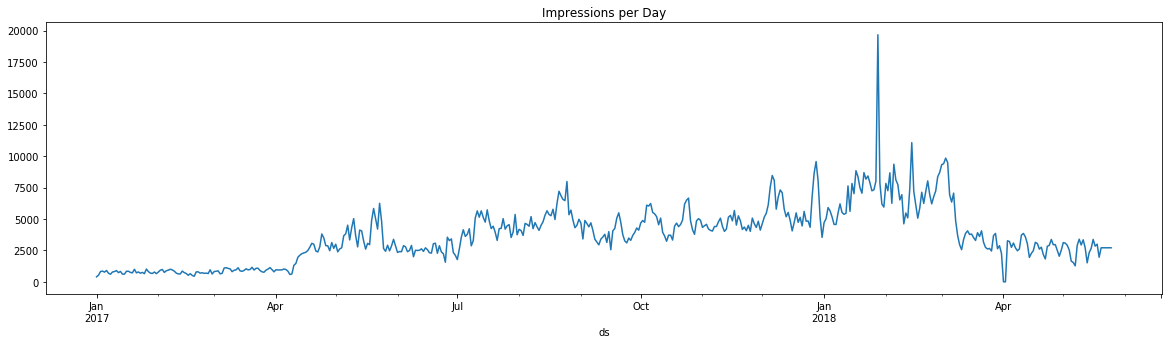

In [5]:
path = 'dataset.csv'
df=pd.read_csv(path)
df['ds']=pd.to_datetime(df['ds'],format='%d/%m/%y')
df=df.fillna(method='ffill')
df=df.set_index(df.ds)
plt.figure(figsize=(20,5))
df['Impr']['2017':'2019'].plot(title='Impressions per Day')

## Build web app using dash

In [18]:
import dash
from dash.dependencies import Input, Output
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

a=[]
for i in df.columns:
    if i !='ds':
        a.append({'label': i, 'value': i})

app = dash.Dash()

app.layout = html.Div([
    
    html.H1('Working'),
    
    dcc.Dropdown(
        id='my-dropdown1',
        options=a,
        multi=True,
        placeholder='Please select one or more metrics.'
    ),
    dcc.Dropdown(
        id='my-dropdown2',
        options=a,
        multi=True,
        placeholder='Please select one or more metrics.'
    ),    

    html.Div(id='my-graph1'),
    html.Div(id='my-graph2')  
])

@app.callback(
    Output(component_id='my-graph1', component_property='children'),
    [Input(component_id='my-dropdown1', component_property='value')]
)


def update_graph(selected_dropdown_value):

    try:
        data=[go.Scatter(x=df.index,y=df[i],name=str(i)) for i in selected_dropdown_value]
    
        return     dcc.Graph(id='outgraph1',
            figure=go.Figure(data=data,
            layout=go.Layout(showlegend=True)
                     ))
    
    except TypeError:
        return dcc.Graph(id='outgraph1')

@app.callback(
    Output(component_id='my-graph2', component_property='children'),
    [Input(component_id='my-dropdown2', component_property='value')]
)

def update_graph(selected_dropdown_value):
    
    try:
        data=[go.Scatter(x=df.index,y=df[i],name=str(i)) for i in selected_dropdown_value]
    
        return     dcc.Graph(id='outgraph2',
            figure=go.Figure(data=data,
            layout=go.Layout(showlegend=True)
                     ))
    
    except TypeError:
        return dcc.Graph(id='outgraph2')    
    
@app.callback(
    Output(component_id='my-graph3', component_property='children'),
    [Input(component_id='my-dropdown2', component_property='value')]
)

if __name__ == '__main__':
    app.run_server(port = 8052)

INFO:werkzeug: * Running on http://127.0.0.1:8052/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:04] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:06] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:06] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:07] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:07] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:07] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:55] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [11/Jun/2018 21:15:55] "POST /_dash-update-component HTTP/1.1" 200 -


## Find trends and make prediction for Impressions

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/Adil/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



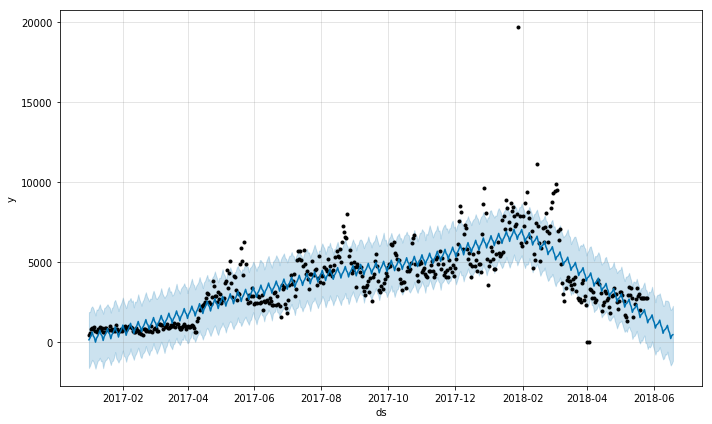

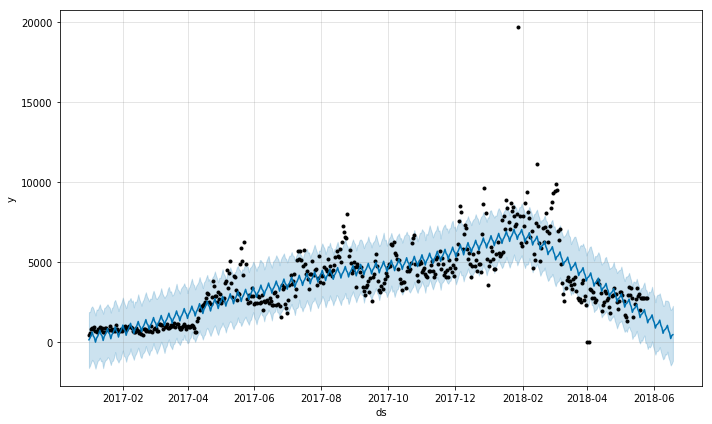

In [16]:
df2 = df.reset_index(drop=True)
df2['y']=df2['Impr']
model = Prophet(mcmc_samples=300)
model.fit(df2)
future = model.make_future_dataframe(periods=24, freq = 'd')
forecast = model.predict(future)
model.plot(forecast)

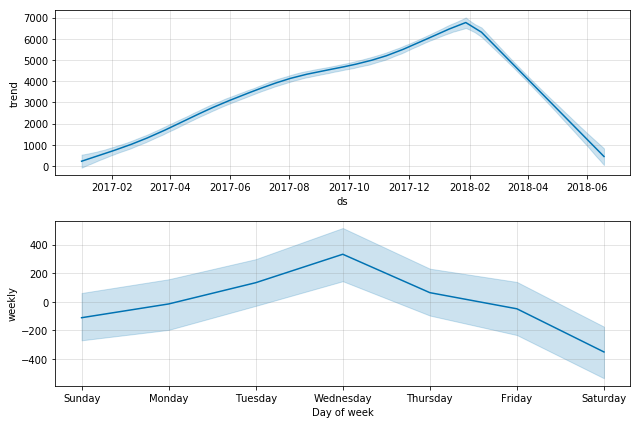

In [17]:
a=model.plot_components(forecast)

## Find trends and make prediction for Sentiments in the News genre

In [ ]:
df2 = df.reset_index(drop=True)
df2['y']=df2['news']
model = Prophet(mcmc_samples=300)
model.fit(df2)
future = model.make_future_dataframe(periods=24, freq = 'd')
forecast = model.predict(future)
model.plot(forecast)

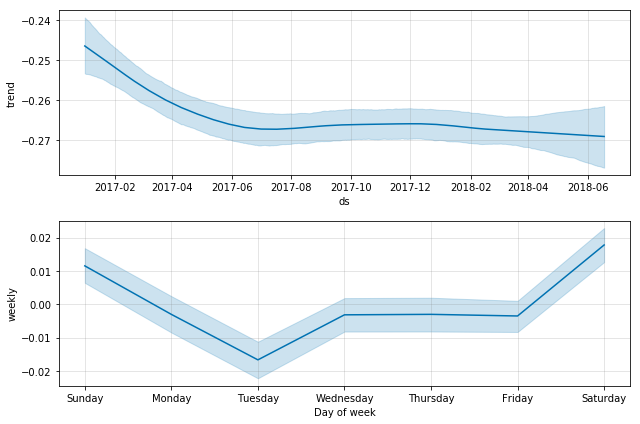

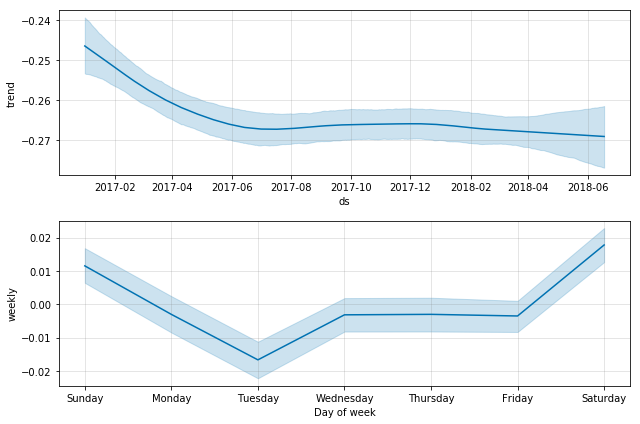

In [21]:
model.plot_components(forecast)